In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, metrics
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models


import skimage.io as io
from skimage.io import imread
from skimage.transform import resize
from PIL import Image

import os
from tqdm import tqdm
from glob import glob

In [2]:
#导入图像并转化为numpy数组
train_path = 'image/'
tumor_label=pd.read_csv('label.csv')
img_size = 200
label = []
nub_train = len(glob(train_path + '/*.jpg'))
image_data = np.zeros((nub_train,img_size,img_size,3),dtype=np.uint8)

i = 0   
for img_path in tqdm(glob(train_path + '/*.jpg')):
    img = Image.open(img_path)
    img = img.resize((img_size,img_size)) #图片resize
    arr = np.asarray(img) #图片转array
    image_data[i, :, :, :] = arr #赋值
    i += 1

for i in range(3000):
    data = tumor_label['label'][i]
    if data == 'no_tumor':
        #label.append(data)
        label.append(0)
    elif data == 'meningioma_tumor':
        #label.append('meningioma_tumor')
        label.append(1)
    elif data == 'glioma_tumor':
        #label.append('glioma_tumor')
        label.append(2)
    elif data == 'pituitary_tumor':
        #label.append('pituitary_tumor')
        label.append(3)
        
image_data = np.array(image_data,dtype='float32')/255.0
label = np.array(label)

100%|██████████| 3000/3000 [00:13<00:00, 230.14it/s]


In [3]:
#new_image = np.delete(image_data, [1,2], axis=3 )

In [4]:
x_train, x_test, y_train, y_test = train_test_split(image_data, label, test_size=0.2, random_state=3)

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=3)

In [6]:
model = models.Sequential([
  layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(200, 200, 3)),
  layers.MaxPooling2D(pool_size=2),
  layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
  layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2),
  layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
  layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2),
  layers.Flatten(),
  layers.Dense(units=128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(units=64, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(4, activation="softmax")
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 128)       1

In [8]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30


C:\Users\10992\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


57/57 [==============================] - 11s 79ms/step - loss: 1.3337 - accuracy: 0.3767 - val_loss: 1.1732 - val_accuracy: 0.5167
Epoch 2/30
57/57 [==============================] - 3s 60ms/step - loss: 1.1485 - accuracy: 0.4972 - val_loss: 0.8922 - val_accuracy: 0.6100
Epoch 3/30
57/57 [==============================] - 3s 59ms/step - loss: 0.9973 - accuracy: 0.5728 - val_loss: 0.8165 - val_accuracy: 0.6717
Epoch 4/30
57/57 [==============================] - 3s 57ms/step - loss: 0.8799 - accuracy: 0.6322 - val_loss: 0.7930 - val_accuracy: 0.6917
Epoch 5/30
57/57 [==============================] - 3s 57ms/step - loss: 0.7820 - accuracy: 0.6778 - val_loss: 0.6585 - val_accuracy: 0.7183
Epoch 6/30
57/57 [==============================] - 3s 56ms/step - loss: 0.6770 - accuracy: 0.7028 - val_loss: 0.6591 - val_accuracy: 0.7517
Epoch 7/30
57/57 [==============================] - 3s 56ms/step - loss: 0.6479 - accuracy: 0.7378 - val_loss: 0.5939 - val_accuracy: 0.7883
Epoch 8/30
57/57 [=====

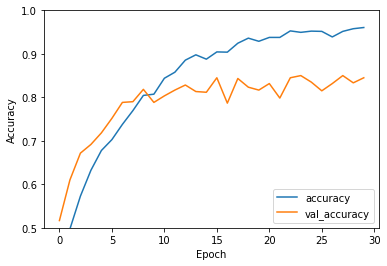

19/19 - 0s - loss: 0.7759 - accuracy: 0.8633


In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [10]:
print(test_acc)

0.8633333444595337
